In [1]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import warnings
warnings.filterwarnings("ignore")
import yfinance as yf
yf.pdr_override()

In [3]:
symbol = 'MSFT'
start = '2021-08-20'
end = '2022-08-20'
dataset = yf.download(symbol,start,end)
dataset.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-08-20,299.720001,305.839996,298.059998,304.359985,301.832123,40817600
2021-08-23,303.250000,305.399994,301.850006,304.649994,302.119751,22830200
2021-08-24,305.019989,305.649994,302.000000,302.619995,300.106567,18175800
2021-08-25,304.299988,304.589996,300.420013,302.010010,299.501678,20006100
2021-08-26,300.989990,302.429993,298.950012,299.089996,296.605896,17666100


In [4]:
dataset.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-08-15,291.000000,294.179993,290.109985,293.470001,292.848389,18085700
2022-08-16,291.989990,294.040009,290.420013,292.709991,292.089996,18102900
2022-08-17,289.739990,293.350006,289.470001,291.320007,291.320007,18253400
2022-08-18,290.190002,291.910004,289.079987,290.170013,290.170013,17186200
2022-08-19,288.899994,289.250000,285.559998,286.149994,286.149994,20557200


In [5]:
Start = 5000
dataset['Shares'] = 0
dataset['PnL'] = 0
dataset['End'] = Start

In [6]:
dataset['Shares'] = dataset['End'].shift(1) / dataset['Adj Close'].shift(1)

In [7]:
dataset['PnL'] = dataset['Shares'] * (dataset['Adj Close'] - dataset['Adj Close'].shift(1))

In [8]:
dataset['End'] = dataset['End'].shift(1) + dataset['PnL']
dataset.head()

,Open,High,Low,Close,Adj Close,Volume,Shares,PnL,End
Date,,,,,,,,,
2021-08-20,299.720001,305.839996,298.059998,304.359985,301.832123,40817600,NaN,NaN,NaN
2021-08-23,303.250000,305.399994,301.850006,304.649994,302.119751,22830200,16.565500,4.764704,5004.764704
2021-08-24,305.019989,305.649994,302.000000,302.619995,300.106567,18175800,16.549729,-33.317643,4966.682357
2021-08-25,304.299988,304.589996,300.420013,302.010010,299.501678,20006100,16.660748,-10.077902,4989.922098
2021-08-26,300.989990,302.429993,298.950012,299.089996,296.605896,17666100,16.694397,-48.343343,4951.656657


In [9]:
dataset.tail()

,Open,High,Low,Close,Adj Close,Volume,Shares,PnL,End
Date,,,,,,,,,
2022-08-15,291.000000,294.179993,290.109985,293.470001,292.848389,18085700,17.164923,26.720141,5026.720141
2022-08-16,291.989990,294.040009,290.420013,292.709991,292.089996,18102900,17.073681,-12.948549,4987.051451
2022-08-17,289.739990,293.350006,289.470001,291.320007,291.320007,18253400,17.118012,-13.180681,4986.819319
2022-08-18,290.190002,291.910004,289.079987,290.170013,290.170013,17186200,17.163256,-19.737640,4980.262360
2022-08-19,288.899994,289.250000,285.559998,286.149994,286.149994,20557200,17.231277,-69.270072,4930.729928


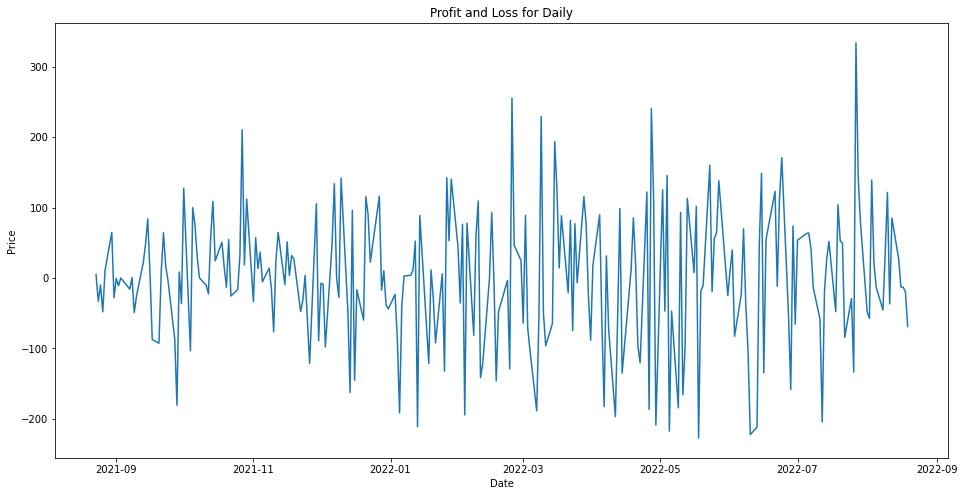

In [10]:
plt.figure(figsize=(16,8))
plt.plot(dataset['PnL'])
plt.title('Profit and Loss for Daily')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

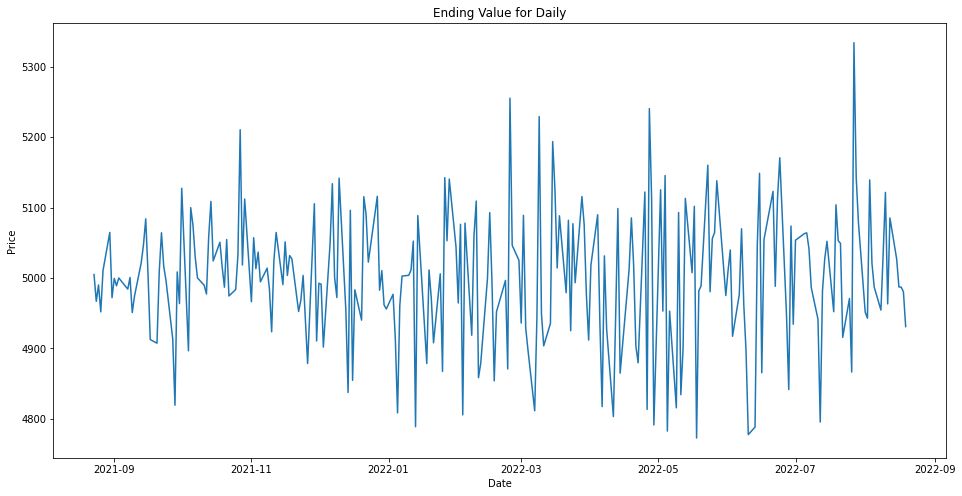

In [11]:
plt.figure(figsize=(16,8))
plt.plot(dataset['End'])
plt.title('Ending Value for Daily')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [12]:
Shares = round(int(float(Start) / dataset['Adj Close'][0]),1)
Purchase_Price = dataset['Adj Close'][0] 
Current_Value = dataset['Adj Close'][-1] 
Purchase_Cost = Shares * Purchase_Price
Current_Value = Shares * Current_Value
Profit_or_Loss = Current_Value - Purchase_Cost 

In [13]:
print(symbol + ' profit or loss of $%.2f' % (Profit_or_Loss))

MSFT profit or loss of $-250.91


In [14]:
percentage_gain_or_loss = (Profit_or_Loss/Current_Value) * 100
print('%s %%' % round(percentage_gain_or_loss,2))

-5.48 %


In [15]:
percentage_returns = (Current_Value - Purchase_Cost)/ Purchase_Cost 
print('%s %%' % round(percentage_returns,2))

-0.05 %


In [16]:
net_gains_or_losses = (dataset['Adj Close'][-1] - dataset['Adj Close'][0]) / dataset['Adj Close'][0]
print('%s %%' % round(net_gains_or_losses,2))

-0.05 %


In [17]:
total_return = ((Current_Value/Purchase_Cost)-1) * 100
print('%s %%' % round(total_return,2))

-5.2 %


In [18]:
print("Financial Analysis")
print('-' * 50)
print(symbol + ' profit or loss of $%.2f' % (Profit_or_Loss))
print('Percentage gain or loss: %s %%' % round(percentage_gain_or_loss,2))
print('Percentage of returns: %s %%' % round(percentage_returns,2))
print('Net gains or losses: %s %%' % round(net_gains_or_losses,2))
print('Total Returns: %s %%' % round(total_return,2))

Financial Analysis
--------------------------------------------------
MSFT profit or loss of $-250.91
Percentage gain or loss: -5.48 %
Percentage of returns: -0.05 %
Net gains or losses: -0.05 %
Total Returns: -5.2 %
